In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\abhil\Downloads\archive (11)\car_prices.csv")

In [3]:
df.head()

,car_id,price,fuel type,gear type,Make,Model,Year of manufacture,Colour,Condition,Mileage,Engine Size,Selling Condition,Bought Condition,car,Trim,Drivetrain,Seats,Number of Cylinders,Horse Power,Registered city
0,icwAaDOmX573WiRRnLFPT237,2812500,Petrol,Automatic,Toyota,Corolla,2004,Silver,Nigerian Used,251732.0,1800.0,Registered,Registered,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ByZ3NlPy2x0arAIyrKazClUS,5000000,Petrol,Automatic,Acura,MDX,2007,Green,Foreign Used,224589.0,3700.0,Imported,Imported,SUV,NaN,NaN,NaN,NaN,NaN,NaN
2,2zG6Mh3kwyoTvWoeKHkV1oFH,7592000,Petrol,Automatic,Acura,TL,2012,White,Foreign Used,111334.0,3500.0,Imported,Imported,Sedan,SH-AWD Automatic Tech Package,All Wheel,5.0,6.0,309.0,NaN
3,7APLHOPlI93qsYK0ST4D4wB2,9880000,Petrol,Automatic,Land Rover,Range Rover,2012,Gray,Nigerian Used,72682.0,4000.0,Registered,Imported,SUV,NaN,NaN,NaN,NaN,NaN,NaN
4,zIrIDPJLd46eRQf9JFacc0e,4160000,Petrol,Automatic,Ford,Edge,2013,Gray,Nigerian Used,92118.0,3500.0,Registered,Registered,SUV,NaN,NaN,NaN,NaN,NaN,Lagos


In [4]:
df.shape

(3722, 20)

In [5]:
df.fillna(method='ffill', inplace=True)

In [6]:
df.isnull().sum()

car_id                 0
price                  0
fuel type              0
gear type              0
Make                   0
Model                  0
Year of manufacture    0
Colour                 0
Condition              0
Mileage                0
Engine Size            0
Selling Condition      0
Bought Condition       0
car                    1
Trim                   2
Drivetrain             2
Seats                  2
Number of Cylinders    2
Horse Power            2
Registered city        4
dtype: int64

In [7]:
df.dtypes

car_id                  object
price                    int64
fuel type               object
gear type               object
Make                    object
Model                   object
Year of manufacture      int64
Colour                  object
Condition               object
Mileage                float64
Engine Size            float64
Selling Condition       object
Bought Condition        object
car                     object
Trim                    object
Drivetrain              object
Seats                  float64
Number of Cylinders    float64
Horse Power            float64
Registered city         object
dtype: object

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(3718, 20)

In [27]:
numeric = df.select_dtypes(include=[np.number])

In [11]:
percentile25 = df.quantile(0.25)
percentile75 = df.quantile(0.75)

C:\Users\abhil\AppData\Local\Temp\ipykernel_8484\3179974459.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  percentile25 = df.quantile(0.25)
C:\Users\abhil\AppData\Local\Temp\ipykernel_8484\3179974459.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  percentile75 = df.quantile(0.75)


In [12]:
percentile25

price                  2310000.00
Year of manufacture       2005.00
Mileage                 117807.25
Engine Size               2000.00
Seats                        5.00
Number of Cylinders          4.00
Horse Power                158.00
Name: 0.25, dtype: float64

In [13]:
percentile75

price                  5023750.00
Year of manufacture       2011.00
Mileage                 245309.25
Engine Size               3500.00
Seats                        5.00
Number of Cylinders          6.00
Horse Power                267.00
Name: 0.75, dtype: float64

In [14]:
iqr = percentile75 - percentile25

In [15]:
iqr

price                  2713750.0
Year of manufacture          6.0
Mileage                 127502.0
Engine Size               1500.0
Seats                        0.0
Number of Cylinders          2.0
Horse Power                109.0
dtype: float64

In [16]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [17]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit price                  9094375.00
Year of manufacture       2020.00
Mileage                 436562.25
Engine Size               5750.00
Seats                        5.00
Number of Cylinders          9.00
Horse Power                430.50
dtype: float64
Lower limit price                 -1760625.00
Year of manufacture       1996.00
Mileage                 -73445.75
Engine Size               -250.00
Seats                        5.00
Number of Cylinders          1.00
Horse Power                 -5.50
dtype: float64


In [18]:
df[df>upper_limit].count()

C:\Users\abhil\AppData\Local\Temp\ipykernel_8484\1967482013.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df[df>upper_limit].count()


car_id                   0
price                  306
fuel type                0
gear type                0
Make                     0
Model                    0
Year of manufacture      2
Colour                   0
Condition                0
Mileage                 90
Engine Size            109
Selling Condition        0
Bought Condition         0
car                      0
Trim                     0
Drivetrain               0
Seats                  577
Number of Cylinders      0
Horse Power             31
Registered city          0
dtype: int64

In [19]:
df[df<lower_limit].count()

C:\Users\abhil\AppData\Local\Temp\ipykernel_8484\581395951.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df[df<lower_limit].count()


car_id                  0
price                   0
fuel type               0
gear type               0
Make                    0
Model                   0
Year of manufacture    14
Colour                  0
Condition               0
Mileage                 0
Engine Size             0
Selling Condition       0
Bought Condition        0
car                     0
Trim                    0
Drivetrain              0
Seats                  67
Number of Cylinders     0
Horse Power             0
Registered city         0
dtype: int64

In [20]:
df.reset_index(inplace=True)

In [21]:
new_df_cap = df.copy()

new_df_cap['price'] = np.where(
    new_df_cap['price'] > upper_limit['price'],
    upper_limit['price'],
    np.where(
        new_df_cap['price'] < lower_limit['price'],
        lower_limit['price'],
        new_df_cap['price']
    )
)


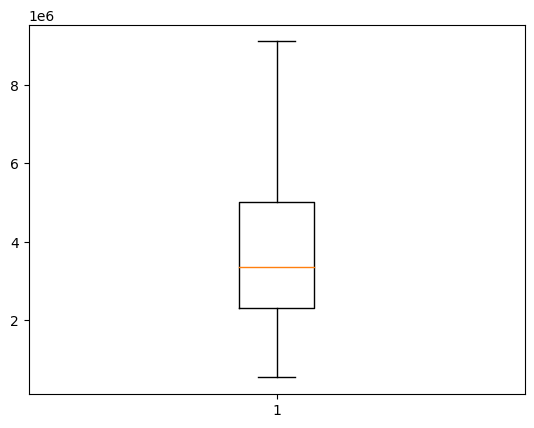

In [22]:
plt.boxplot(new_df_cap['price'])
plt.show()

In [23]:
new_df_cap['Mileage'] = np.where(
    new_df_cap['Mileage'] > upper_limit['Mileage'],
    upper_limit['Mileage'],
    np.where(
        new_df_cap['Mileage'] < lower_limit['Mileage'],
        lower_limit['Mileage'],
        new_df_cap['Mileage']
    )
)

new_df_cap['Engine Size'] = np.where(
    new_df_cap['Engine Size'] > upper_limit['Engine Size'],
    upper_limit['Engine Size'],
    np.where(
        new_df_cap['Engine Size'] < lower_limit['Engine Size'],
        lower_limit['Engine Size'],
        new_df_cap['Engine Size']
    )
)
new_df_cap['Seats'] = np.where(
    new_df_cap['Seats'] > upper_limit['Seats'],
    upper_limit['Seats'],
    np.where(
        new_df_cap['Seats'] < lower_limit['Seats'],
        lower_limit['Seats'],
        new_df_cap['Seats']
    )
)
new_df_cap['Horse Power'] = np.where(
    new_df_cap['Horse Power'] > upper_limit['Horse Power'],
    upper_limit['Horse Power'],
    np.where(
        new_df_cap['Horse Power'] < lower_limit['Horse Power'],
        lower_limit['Horse Power'],
        new_df_cap['Horse Power']
    )
)
new_df_cap['Year of manufacture'] = np.where(
    new_df_cap['Year of manufacture'] > upper_limit['Year of manufacture'],
    upper_limit['Year of manufacture'],
    np.where(
        new_df_cap['Year of manufacture'] < lower_limit['Year of manufacture'],
        lower_limit['Year of manufacture'],
        new_df_cap['Year of manufacture']
    )
)

In [26]:
numeric1 = new_df_cap.select_dtypes(include=[np.number])

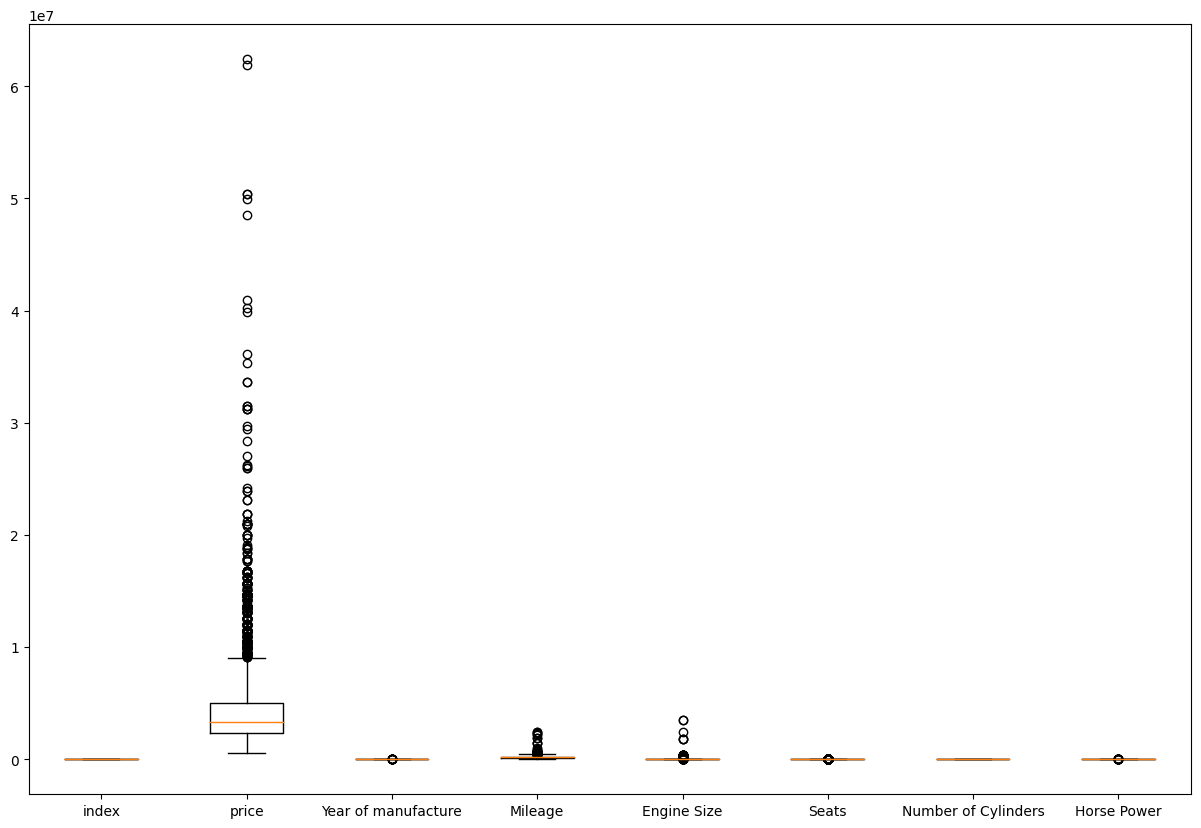

In [34]:
plt.figure(figsize=(15, 10))
labels = numeric.columns
plt.boxplot(numeric, labels=labels)
plt.show()

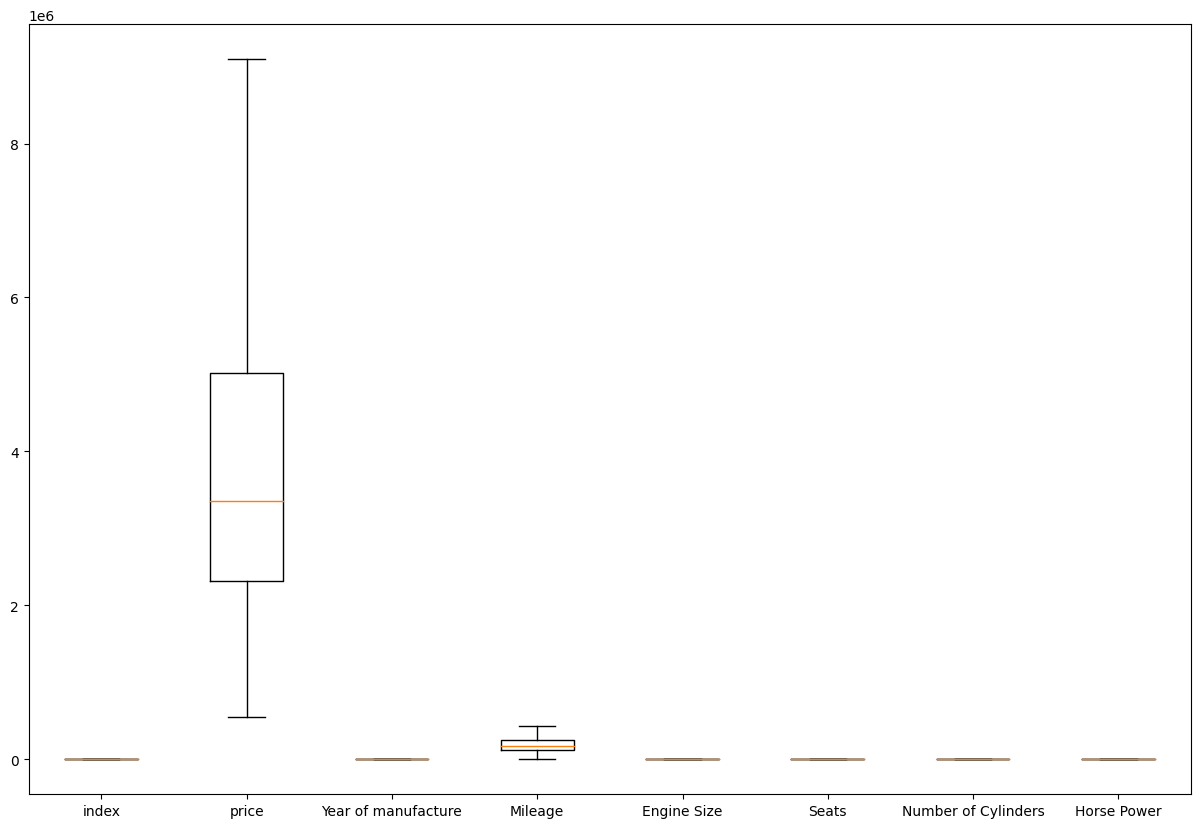

In [36]:
plt.figure(figsize=(15, 10))
labels = numeric1.columns           
plt.boxplot(numeric1, labels=labels)
plt.show()